In [1674]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [1675]:
loan_df = pd.read_csv('./loan.csv',sep=',' ,  dtype='unicode')

In [1676]:
cont_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti',
'revol_bal','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','total_acc','open_acc']

cat_cols = ['id','member_id','term','grade','sub_grade','emp_title','emp_length','home_ownership',
'verification_status','loan_status','pymnt_plan','url','desc','purpose','title','zip_code','addr_state',
'delinq_2yrs','inq_last_6mths','mths_since_last_delinq','mths_since_last_record',
'initial_list_status','collections_12_mths_ex_med','mths_since_last_major_derog','policy_code','application_type',
'annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal',
'open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m',
'open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths',
'avg_cur_bal','bc_open_to_buy','bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc',
'mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd',
'num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts',
'num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m',
'pct_tl_nvr_dlq','percent_bc_gt_75','tax_liens','tot_hi_cred_lim','total_bal_ex_mort',
'total_bc_limit','total_il_high_credit_limit']

date_cols = ['issue_d','earliest_cr_line','last_pymnt_d','next_pymnt_d','last_credit_pull_d']
other_cols = ['revol_util','int_rate','pub_rec','pub_rec_bankruptcies','out_prncp','out_prncp_inv']

In [1677]:
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: str(x).rstrip('%'))
loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x: str(x).rstrip('%'))  

for col1 in cat_cols:
    loan_df[col1] = loan_df[col1].astype('object',copy=False)

for col2 in cont_cols:
    loan_df[col2] = pd.to_numeric(loan_df[col2], errors='coerce')
    
for col3 in other_cols:
    loan_df[col3] = pd.to_numeric(loan_df[col3], errors='coerce')    

loan_df['earliest_cr_line']=loan_df['earliest_cr_line'].apply(lambda x: pd.datetime.strptime(str(x), '%b-%y').strftime('%m-%Y'))
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df['earliest_cr_line'])

loan_df['issue_d']=loan_df['issue_d'].apply(lambda x: pd.datetime.strptime(x, '%b-%y').strftime('%m-%Y'))
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'])

loan_df['last_pymnt_d'] = pd.to_datetime(loan_df['last_pymnt_d'], errors = 'coerce')

loan_df['next_pymnt_d'] = pd.to_datetime(loan_df['next_pymnt_d'], errors = 'coerce')

loan_df['last_credit_pull_d'] = pd.to_datetime(loan_df['last_credit_pull_d'], errors = 'coerce')

In [1678]:
loan_df = loan_df.drop(['mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl',
              'mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq',
             'mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd',
              'num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl',
             'num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats',
              'num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m',
              'num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim',
              'total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','annual_inc_joint','dti_joint',
                        'verification_status_joint','tot_coll_amt','tot_cur_bal',
                       'open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il',
                       'il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi',
                       'total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util',
                       'mths_since_last_major_derog','mo_sin_old_il_acct','next_pymnt_d','mths_since_last_record',
                        'mths_since_last_delinq'], axis=1)




In [1679]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
id                            39717 non-null object
member_id                     39717 non-null object
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null datetime64[ns]
loan_status                   39717 non-null obje

### Outlier Treatment

In [1680]:
for col in cont_cols:
    percentiles = loan_df[col].quantile([0.01,0.97]).values
    loan_df[col][loan_df[col] <= percentiles[0]] = percentiles[0]
    loan_df[col][loan_df[col] >= percentiles[1]] = percentiles[1]


c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [1681]:
loan_df.drop(['id', 'member_id', 'url', 'desc', 'zip_code','acc_now_delinq','policy_code','collections_12_mths_ex_med','initial_list_status'], axis=1, inplace=True)
loan_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
loan_amnt                   39717 non-null int64
funded_amnt                 39717 non-null int64
funded_amnt_inv             39717 non-null float64
term                        39717 non-null object
int_rate                    39717 non-null float64
installment                 39717 non-null float64
grade                       39717 non-null object
sub_grade                   39717 non-null object
emp_title                   37258 non-null object
emp_length                  38642 non-null object
home_ownership              39717 non-null object
annual_inc                  39717 non-null float64
verification_status         39717 non-null object
issue_d                     39717 non-null datetime64[ns]
loan_status                 39717 non-null object
pymnt_plan                  39717 non-null object
purpose                     39717 non-null object
title                       397

In [1682]:
# loan_df.info()
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
purpose                       0.00
title                         0.03
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal                     0.00
revol_util                    0.13
total_acc                     0.00
out_prncp           

In [1683]:
# loan_df.pymnt_plan.unique() this will not been usefull as only one value array(['n'], dtype=object)
#url has no insight aither then account id 
# desc is too informative but we don't know how to deal as based on NLP (text processing)
# purpose already cover above
# loan_df.title 
#zip_code no need to analysis
#addr_state
loan_df['pub_rec_bankruptcies'] = np.where(loan_df['pub_rec_bankruptcies'].isnull(), 0, loan_df['pub_rec_bankruptcies'])
loan_df['tax_liens'] = np.where(loan_df['tax_liens'].isnull(), 0, loan_df['tax_liens'])
loan_df['emp_title'] = np.where(loan_df['emp_title'].isnull(), 'Others', loan_df['emp_title'])
loan_df['issue_year'] = loan_df['issue_d'].dt.year
loan_df['issue_month'] = loan_df['issue_d'].dt.month
loan_df['earliest_cr_line_in_year']=loan_df['earliest_cr_line'].dt.year

In [1684]:
loan_df['pub_rec_bankruptcies'] = loan_df['pub_rec_bankruptcies'].astype(int)
loan_df['revol_util'] = np.where(loan_df['revol_util'].isnull(), 0, loan_df['revol_util'])

### Univariate Analysis

##### Analysis of Continuous Variables

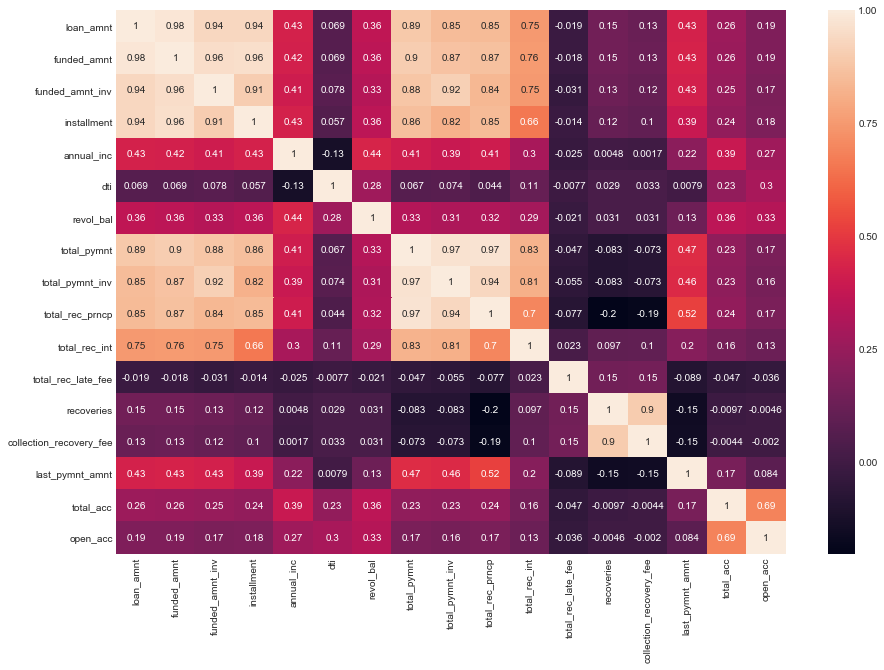

In [1685]:
# Correlation Analysis - Overall

corr = loan_df[cont_cols].corr()
plt.figure(figsize=(15, 10))

sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.show()

c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


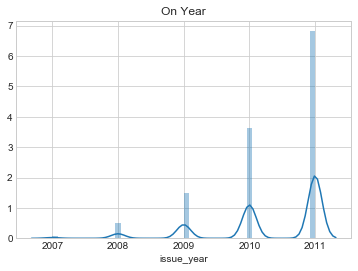

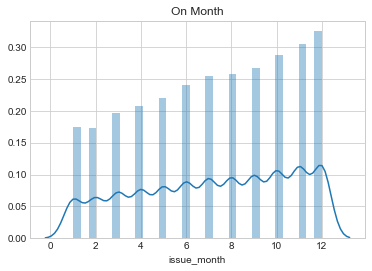

In [1686]:
#'issue_d', 'loan_status','purpose',title','addr_state', 'dti', 'delinq_2yrs',
#'earliest_cr_line','inq_last_6mths', 'open_acc', 'pub_rec','revol_bal','revol_util', 'total_acc', 'initial_list_status'

plt.title('On Year')
sns.distplot(loan_df.issue_year)
plt.show()

plt.title('On Month')
sns.distplot(loan_df.issue_month)
plt.show()

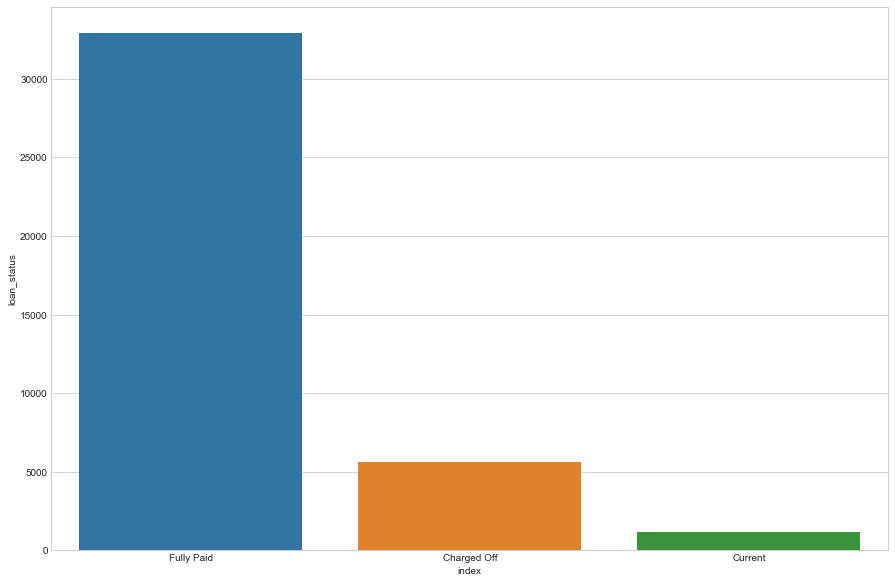

In [1930]:
# Distribution on loan_status
plt.figure(figsize=(15, 10))
sns.barplot(x='index', y='loan_status', data=loan_status_reg)
plt.show()


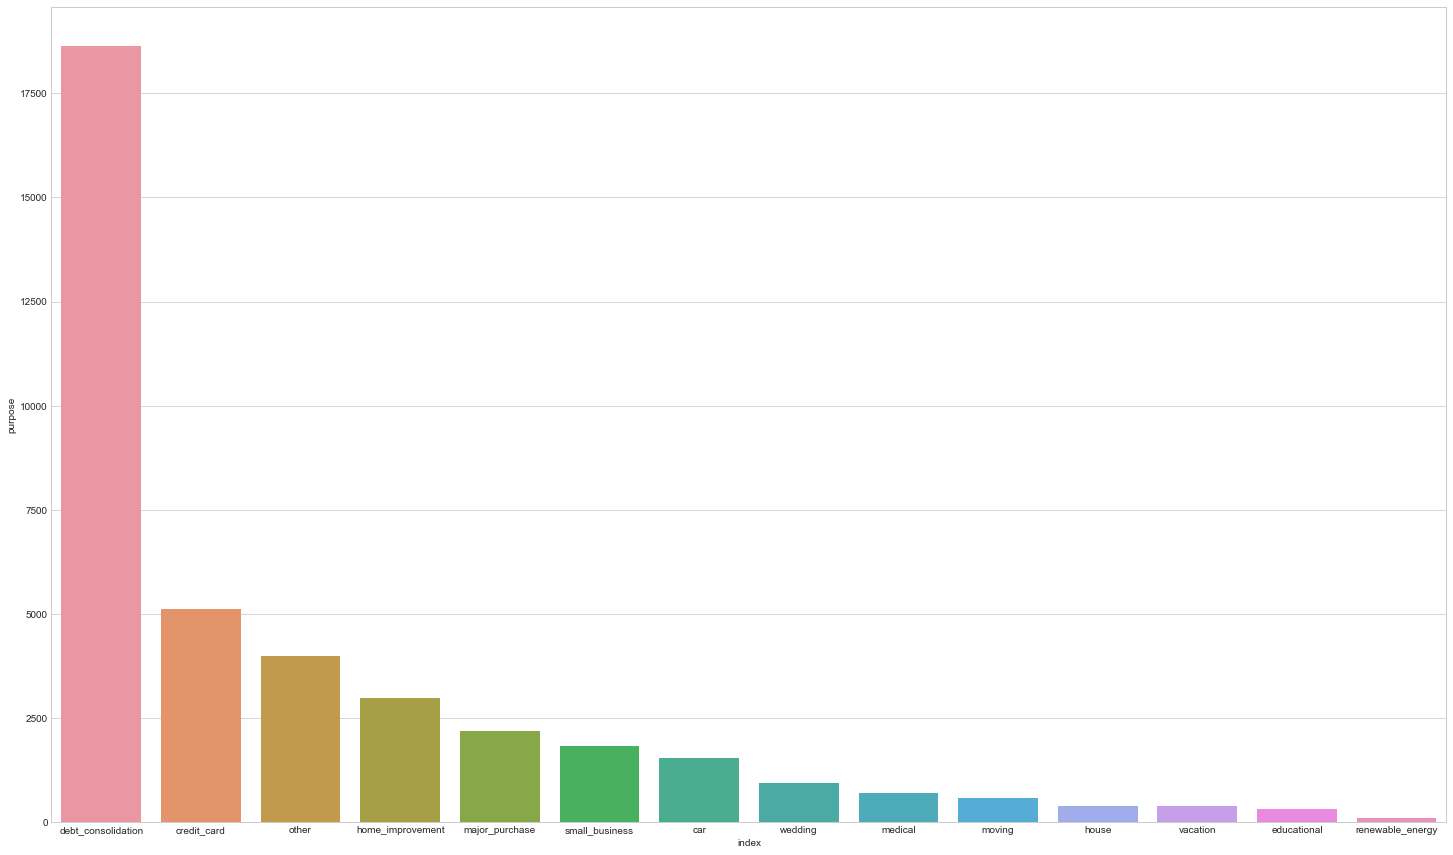

In [1932]:
#distribution for purpose
plt.figure(figsize=(25, 15))
sns.barplot(x='index', y='purpose', data=purpose_reg)
plt.show()
# purpose_reg.head()

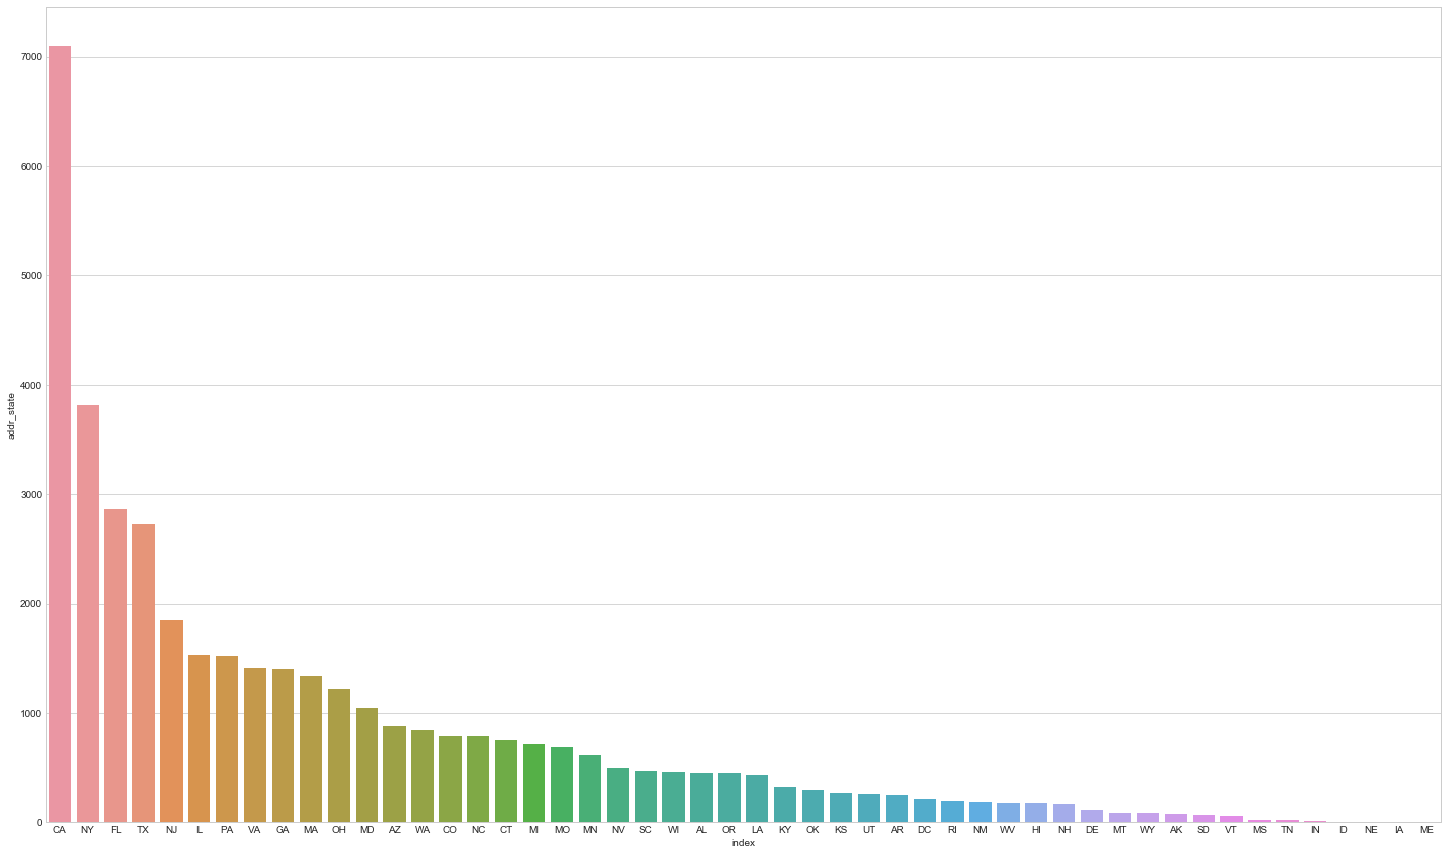

In [1927]:
#Power Low distribution for purpose unOrder Categorical
plt.figure(figsize=(25, 15))
sns.barplot(x='index', y='addr_state', data=address_reg)
plt.show()

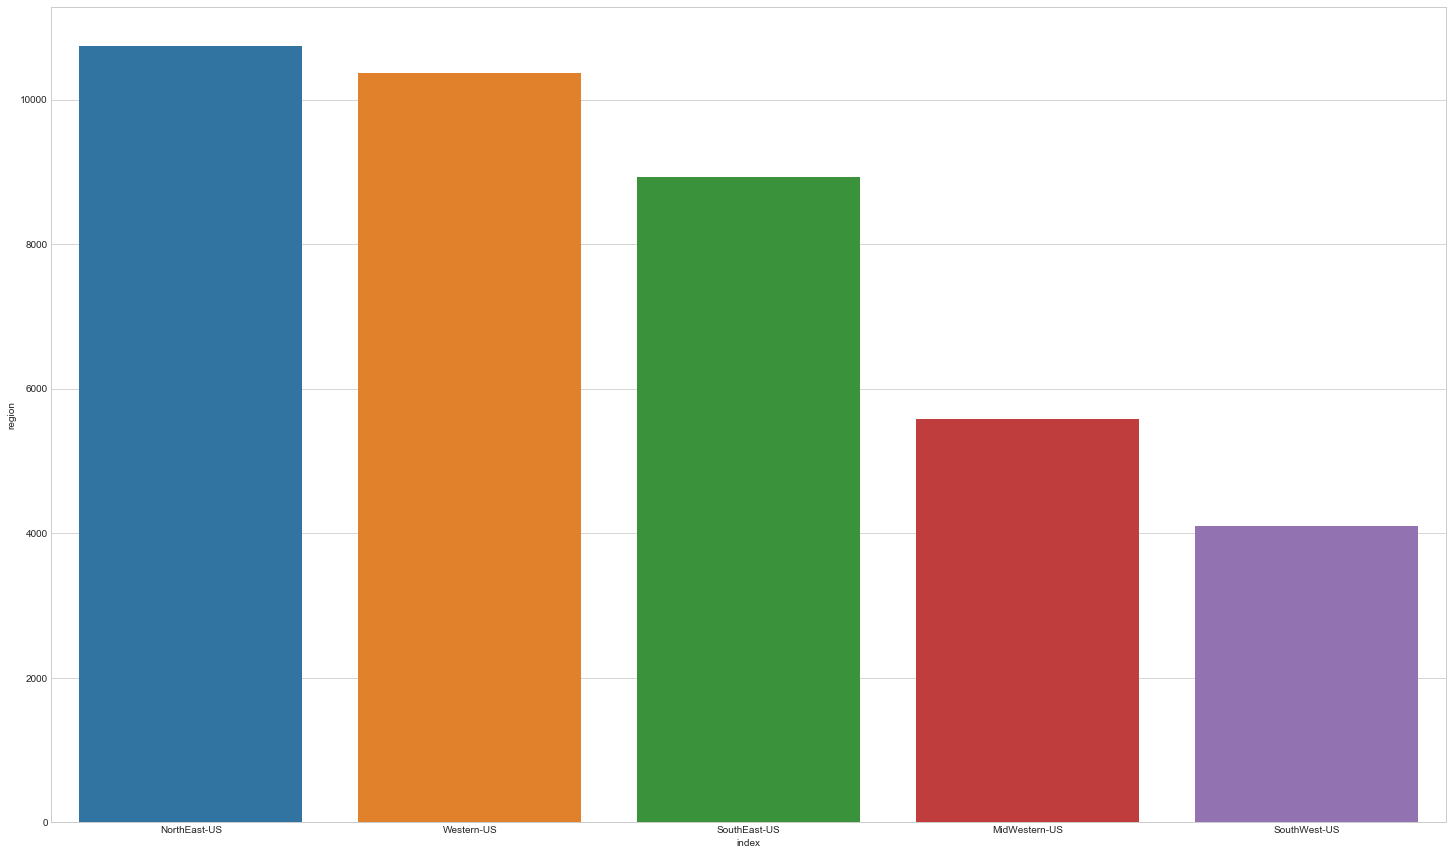

In [1933]:
western_us = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west_us = ['AZ', 'TX', 'NM', 'OK']
south_east_us = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_western_us = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east_us = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

loan_df['region'] = np.nan
def finding_regions(state):
    if state in western_us:
        return 'Western-US'
    elif state in south_west_us:
        return 'SouthWest-US'
    elif state in south_east_us:
        return 'SouthEast-US'
    elif state in mid_western_us:
        return 'MidWestern-US'
    elif state in north_east_us:
        return 'NorthEast-US'
    
loan_df['region'] = loan_df['addr_state'].apply(finding_regions)

plt.figure(figsize=(25, 15))
sns.barplot(x='index', y='region', data=region_reg)
plt.show()

c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


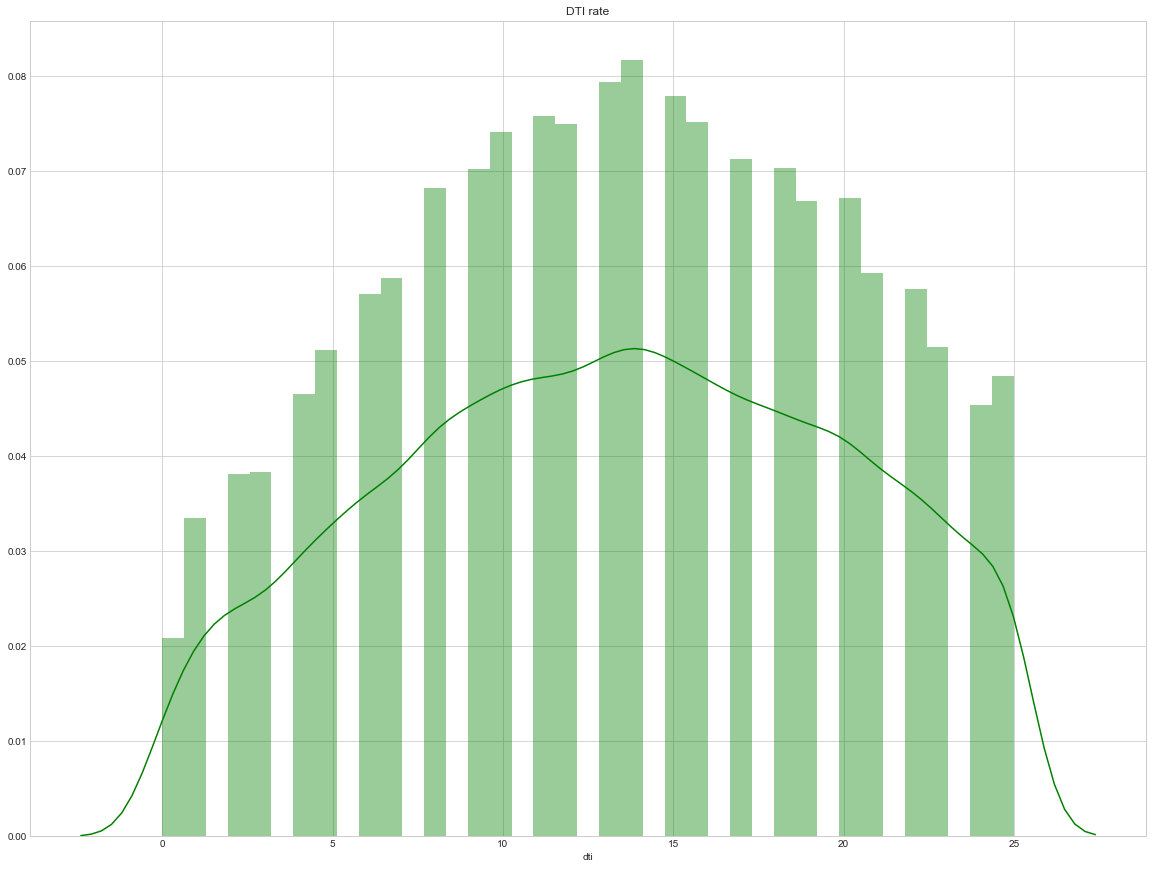

In [1934]:
# Histogram dti rate variable distribution (Debt-to-income ratio (DTI for short) is a simple calculation 
#banks and other financial companies use to see if you are going to be able to pay back their loan. 
#It’s the amount of your monthly debt obligations divided by your monthly income.)
# to get loan you should excellent credit and an extremely low debt to income ratio.

plt.figure(figsize=(20, 15))
plt.title('DTI rate')
sns.distplot(loan_df.dti.round(), color="g")
plt.show()


c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


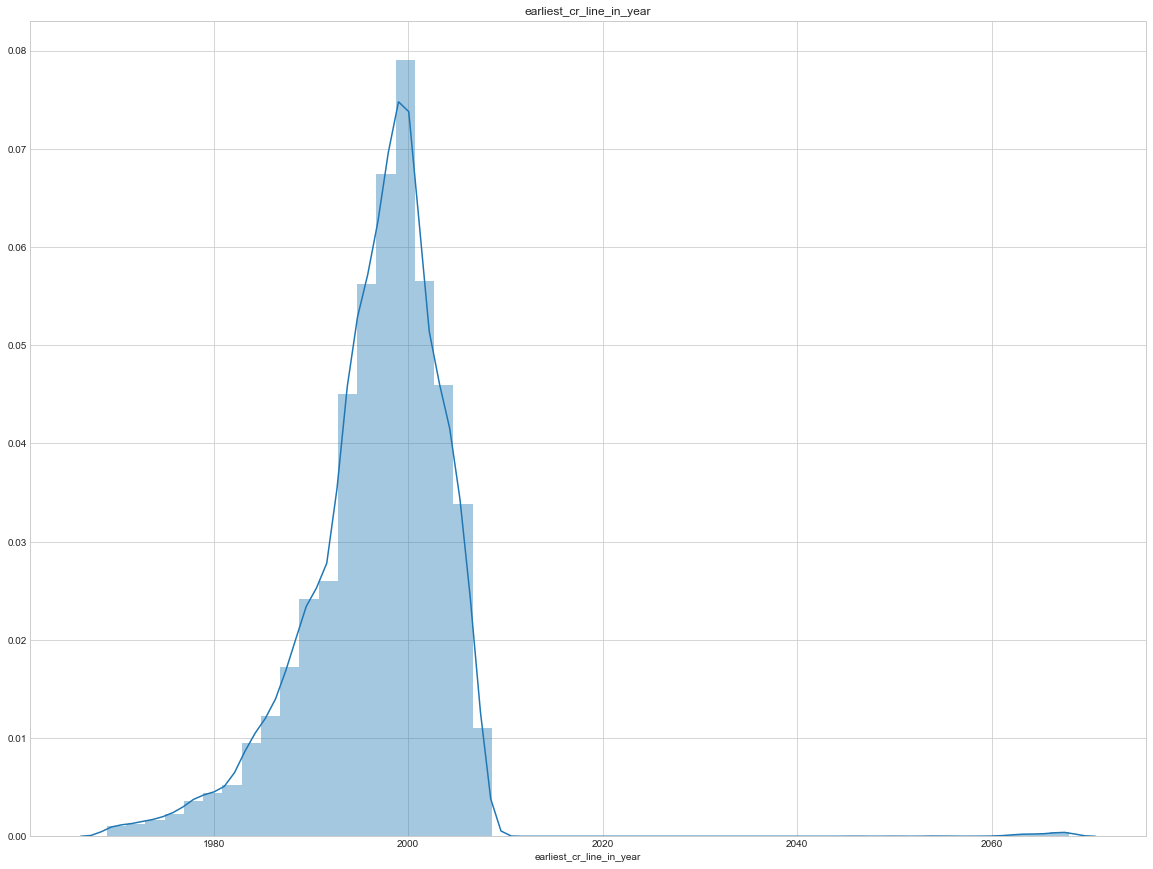

In [1693]:
plt.figure(figsize=(20, 15))
plt.title('earliest_cr_line_in_year')
sns.distplot(loan_df.earliest_cr_line_in_year)
plt.show()

Median:  20.0
-----------------------------------
count    39717.000000
mean        21.876728
std         10.789497
min          4.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         47.000000
Name: total_acc, dtype: float64


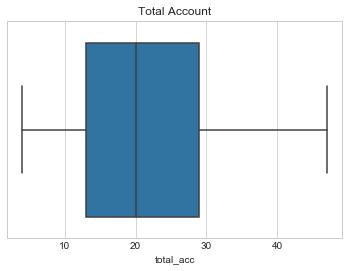

------------------------------------
Median:  9.0
-----------------------------------
count    39717.000000
mean         9.200670
std          4.115437
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         19.000000
Name: open_acc, dtype: float64


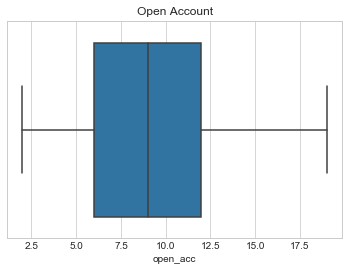

In [1935]:
print('Median: ', loan_df.total_acc.median())
print('-----------------------------------')
print(loan_df.total_acc.round().describe()) 

sns.boxplot(x=loan_df['total_acc'])
plt.title('Total Account')
plt.show()

print('------------------------------------')

print('Median: ', loan_df.open_acc.median())
print('-----------------------------------')
print(loan_df.open_acc.round().describe()) 

sns.boxplot(x=loan_df['open_acc'])
plt.title('Open Account')
plt.show()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64
Median  0.0
----------------------------
0    38036
1     1674
2        7
Name: pub_rec_bankruptcies, dtype: int64
Median  0.0


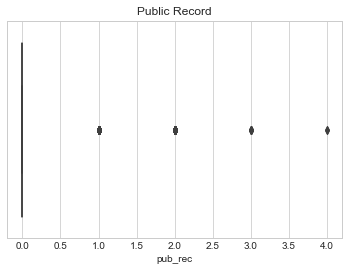

In [1695]:
print(loan_df.pub_rec.value_counts())
print('Median ',loan_df.pub_rec.median())
print('----------------------------')
print(loan_df.pub_rec_bankruptcies.value_counts())
print('Median ',loan_df.pub_rec_bankruptcies.median())

sns.boxplot(x=loan_df['pub_rec'])
plt.title('Public Record')
plt.show()


c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


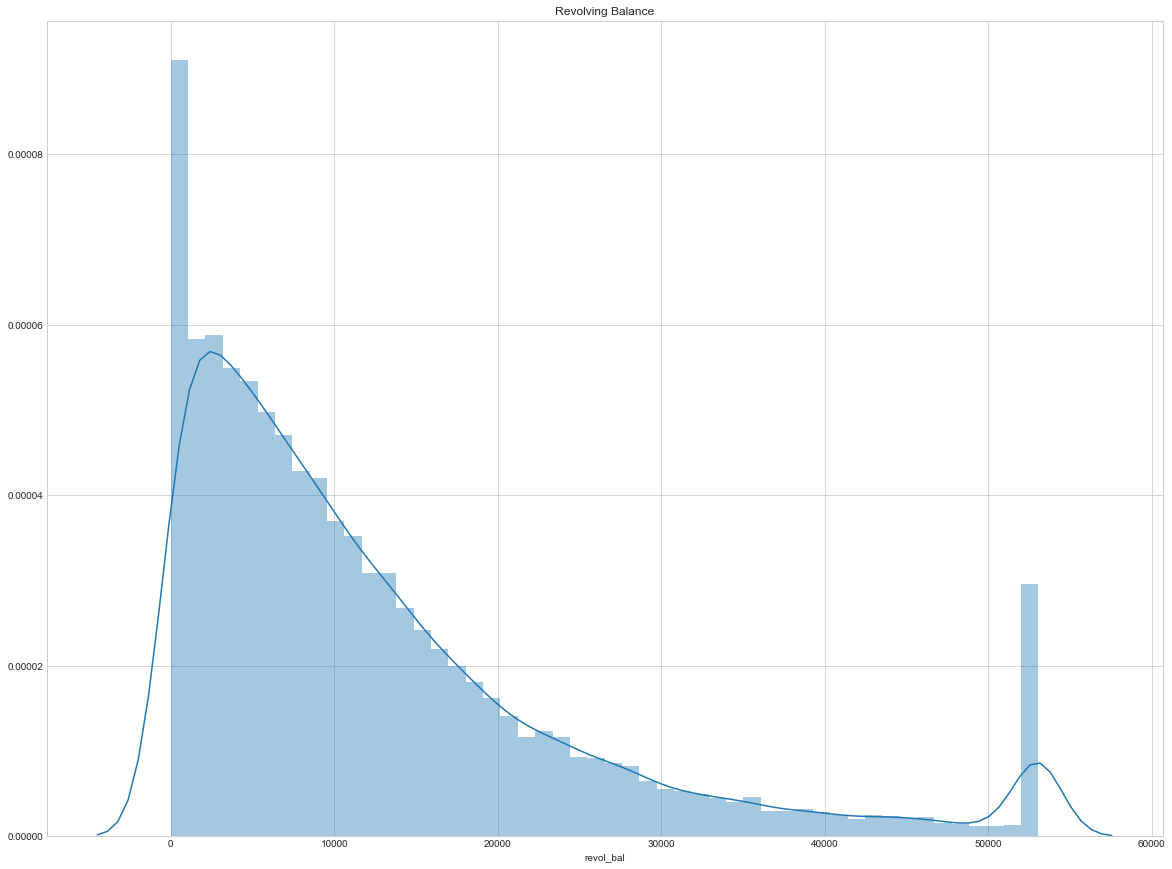

In [1696]:
#Total credit revolving balance (In credit card terms, a revolving balance is the portion of credit 
#card spending that goes unpaid at the end of a billing cycle. The amount can vary, going up or down 
#depending on the amount borrowed and the amount repaid. ... When the balance is paid off, the customer is no 
#longer revolving the debt.) more revolving bal higher risk of charged off

plt.figure(figsize=(20, 15))
plt.title('Revolving Balance')
sns.distplot(loan_df.revol_bal)
plt.show()

#ok

c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


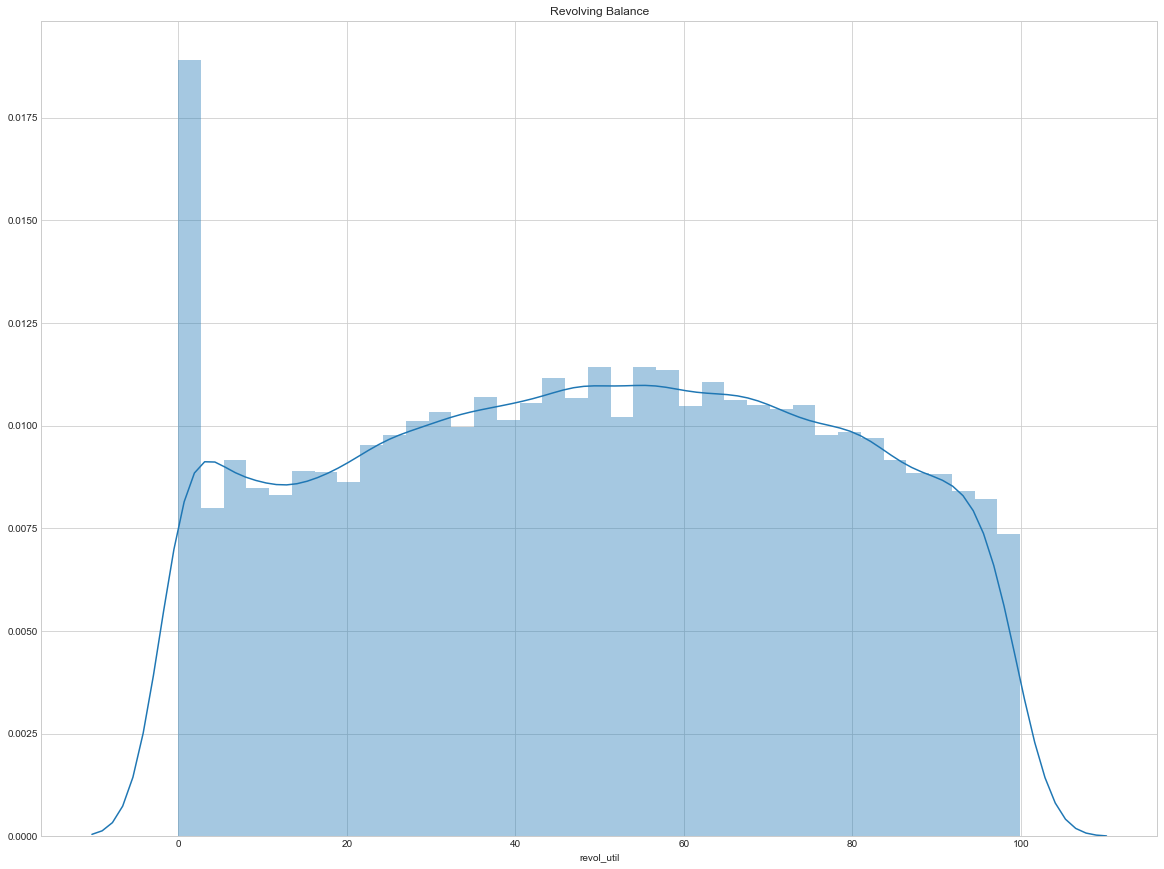

In [1697]:
plt.figure(figsize=(20, 15))
plt.title('Revolving Balance')
sns.distplot(loan_df.revol_util)
plt.show()

### Segmented Analysis

For Risk analysis we need to define the No Risk loan and moderate risk loan, as we know in loan_status analysis we have 3 type of loan 1. Full Paid, 2. Current, 3. Charged Off, Charged Off loan can have moderate Risk, so for this I am going to evaluate the loan_status with dti.

               count       mean       std   min    25%    50%     75%    max
loan_status                                                                 
Charged Off   5627.0  13.961065  6.504004  0.35  9.050  14.29  19.290  24.54
Current       1140.0  14.624482  6.483767  0.35  9.745  15.05  20.045  24.54
Fully Paid   32950.0  13.104072  6.583632  0.35  7.980  13.20  18.390  24.54


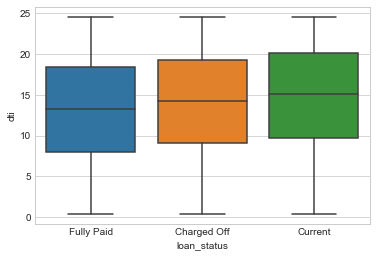

In [1698]:
print(loan_df.groupby('loan_status')['dti'].describe())

sns.boxplot(x='loan_status', y='dti', data=loan_df)
plt.show()

#change the plot based on the count and median.

In [1699]:
#create two type of loan No-Risk and Moderate-Risk, As we can see only 1140 is Current loan and the 
#50% qurtile dti ratio is more then 15%, assuption is more dti rate more risk on loan, I can add current and 
#charged-Off as on Moderate-Rsik
#As Current status can be go to charged off this is risk factor.


Moderate_Risk = ["Charged Off", "Current"]

def loan_risk(status):
    if status in Moderate_Risk:
        return 'Moderate-risk'
    else:
        return 'No-Risk'
        
loan_df['loan_risk'] = loan_df['loan_status'].apply(loan_risk)

[Text(0,0.5,'(%)')]

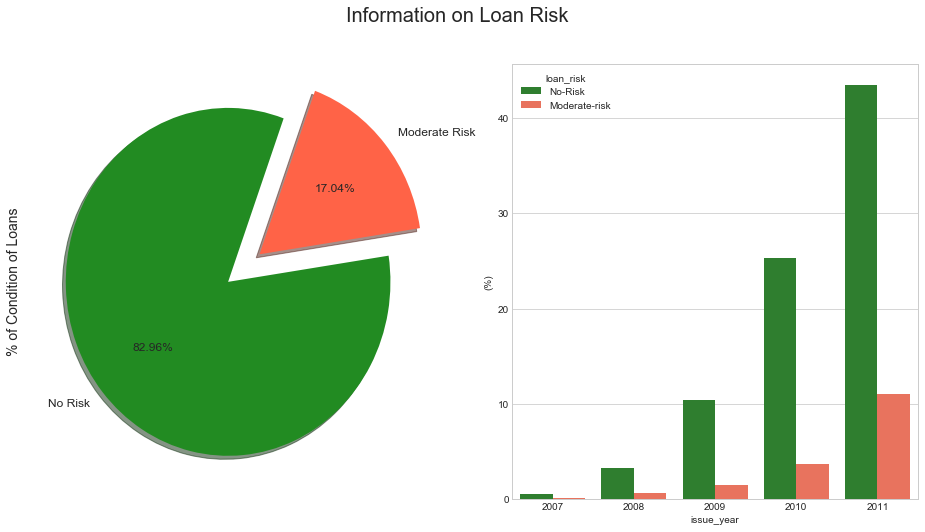

In [1700]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#228B22", "#FF6347"]
labels ="No Risk", "Moderate Risk"

plt.suptitle('Information on Loan Risk', fontsize=20)

loan_df["loan_risk"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


ax[0].set_ylabel('% of Condition of Loans', fontsize=14)
palette = ["#228B22", "#FF6347"]
sns.barplot(x="issue_year", y="loan_amnt", hue="loan_risk", data=loan_df, palette=palette, estimator=lambda x: len(x) / len(loan_df) * 100)
ax[1].set(ylabel="(%)")

c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """


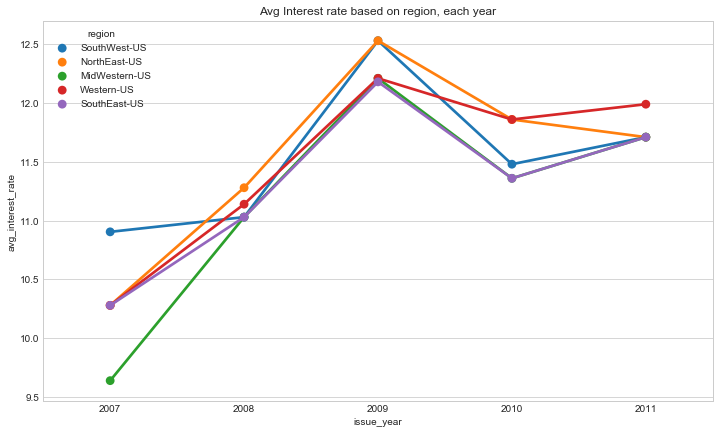

c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


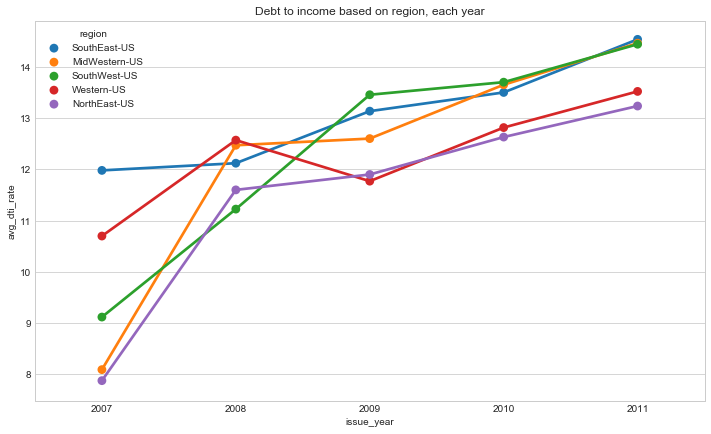

c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


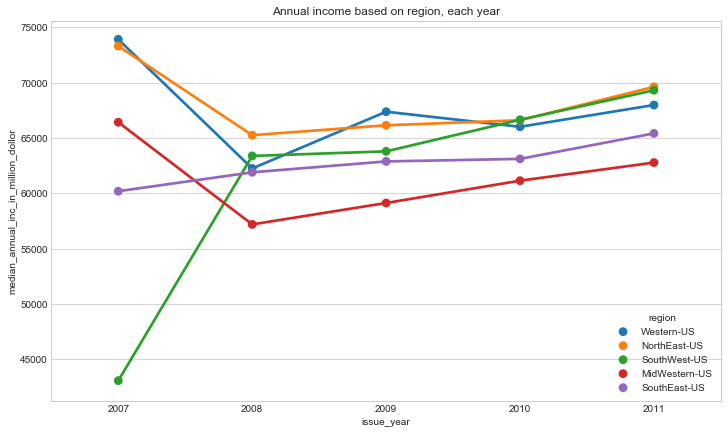

In [1942]:
#Loan issue by Region based analysis

# loan_df.groupby(['issue_year', 'region']).int_rate.mean()
plt.figure(figsize=(12, 7))
region_wise_int_avg = loan_df.groupby(['issue_year','region'])['int_rate'].agg({'avg_interest_rate':'median'})
region_wise_int_avg = region_wise_int_avg.sort_values('avg_interest_rate', ascending=False)
region_wise_int_avg.columns.name = None
region_wise_int_avg = region_wise_int_avg.reset_index()
region_wise_int_avg

plt.title('Avg Interest rate based on region, each year')
sns.pointplot(x = region_wise_int_avg.issue_year ,
              y = region_wise_int_avg.avg_interest_rate , 
              hue = region_wise_int_avg.region)

plt.show()

plt.figure(figsize=(12, 7))
region_wise_dti_avg = loan_df.groupby(['issue_year','region'])['dti'].agg({'avg_dti_rate':'median'})
region_wise_dti_avg = region_wise_dti_avg.sort_values('avg_dti_rate', ascending=False)
region_wise_dti_avg.columns.name = None
region_wise_dti_avg = region_wise_dti_avg.reset_index()
region_wise_dti_avg

plt.title('Debt to income based on region, each year')
sns.pointplot(x = region_wise_dti_avg.issue_year ,
              y = region_wise_dti_avg.avg_dti_rate , 
              hue = region_wise_dti_avg.region)

plt.show()

plt.figure(figsize=(12, 7))
region_wise_annual_inc = loan_df.groupby(['issue_year','region'])['annual_inc'].agg({'median_annual_inc_in_million_dollor':'mean'})
region_wise_annual_inc = region_wise_annual_inc.sort_values('median_annual_inc_in_million_dollor', ascending=False)
region_wise_annual_inc.columns.name = None
region_wise_annual_inc = region_wise_annual_inc.reset_index()
region_wise_annual_inc

plt.title('Annual income based on region, each year')
sns.pointplot(x = region_wise_annual_inc.issue_year ,
              y = region_wise_annual_inc.median_annual_inc_in_million_dollor , 
              hue = region_wise_annual_inc.region)

plt.show()



#Findings: MidWestern-US SouthEast-US and SouthWest-US had a rapid increase in debt-to-income starting in 2011.
# MidWestern-US,SouthEast-US and SouthWest-US had a rapid increase in interest rates (This might explain 
#the increase in debt to income).


## Risk Analysis

### Analysis of Derived Metrics

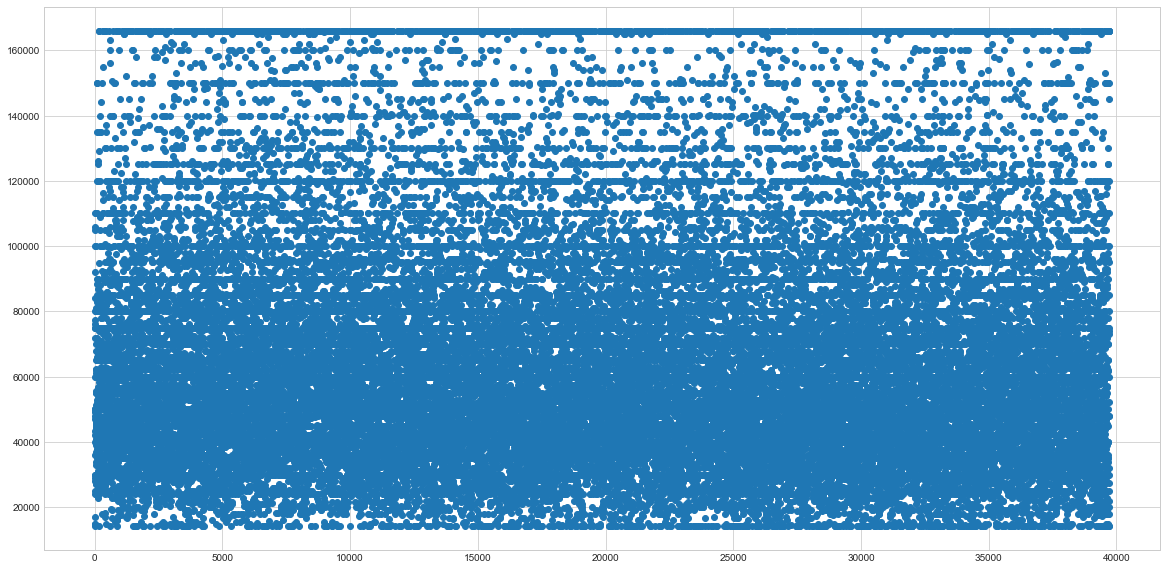

In [1702]:
plt.figure(figsize=(20, 10))
plt.scatter(x=loan_df.index, y='annual_inc',data=loan_df)
plt.show()

#Distribution of annual_inc is looks fine we can derived income category into 4 category 

In [1703]:
loan_df['income_category'] = np.nan
lst = [loan_df]

for col in lst:
    col.loc[col['annual_inc'] <= 30000, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 30000) & (col['annual_inc'] <= 60000), 'income_category'] = 'Low_med'
    col.loc[(col['annual_inc'] > 60000) & (col['annual_inc'] <= 90000), 'income_category'] = 'High_med'
    col.loc[col['annual_inc'] > 90000, 'income_category'] = 'High'


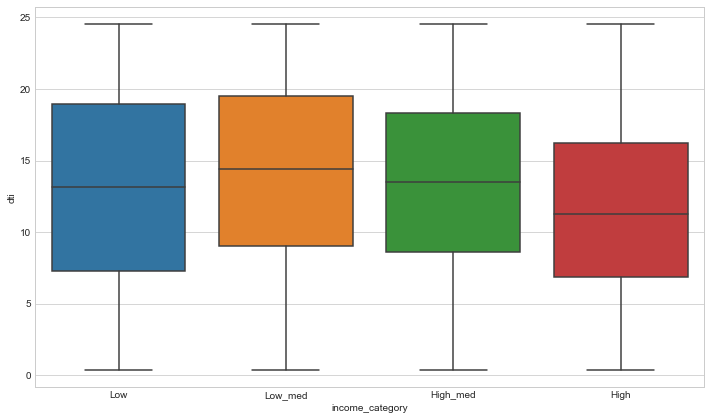

In [1704]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='income_category', y='dti', data=loan_df)
plt.show()

In [1705]:
#Now we need to see operative side of businessstate, Loans issued by state (Total Sum), Average interest rates charged to 
#customers and average annual income of all customers by state.

In [1706]:
loan_df['outstanding_bal'] = loan_df.funded_amnt - loan_df.total_rec_prncp

c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  after removing the cwd from sys.path.


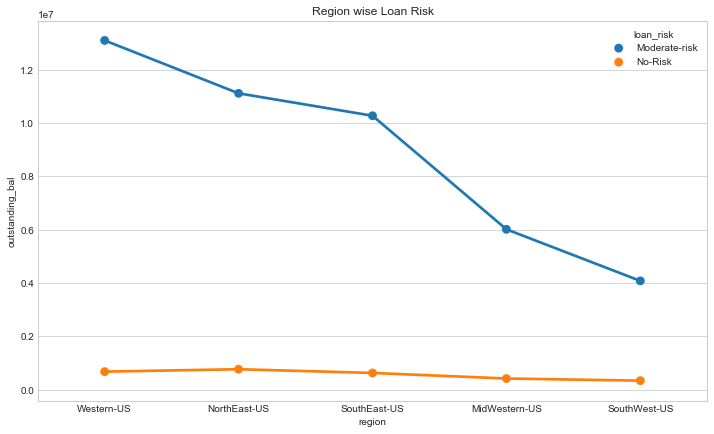

c:\users\brsingh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


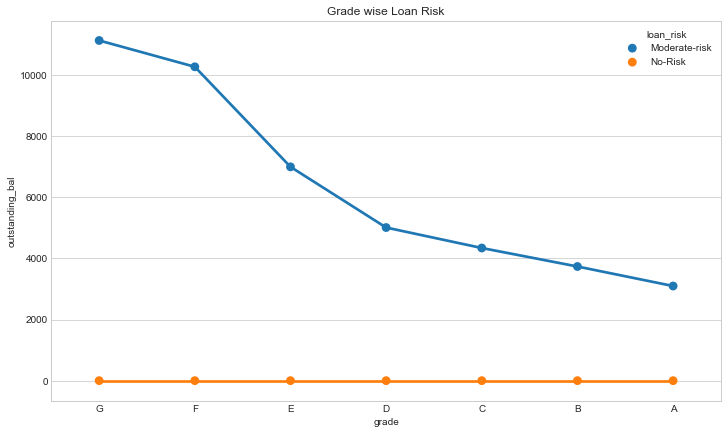

In [1943]:

plt.figure(figsize=(12, 7))

region_wise_loan_risk = loan_df.groupby(['loan_risk','region'])['outstanding_bal'].agg({'outstanding_bal':'sum'})
region_wise_loan_risk = region_wise_loan_risk.sort_values('outstanding_bal', ascending=False)
region_wise_loan_risk.columns.name = None
region_wise_loan_risk = region_wise_loan_risk.reset_index()
region_wise_loan_risk

plt.title('Region wise Loan Risk')
sns.pointplot(x = region_wise_loan_risk.region ,
              y = region_wise_loan_risk.outstanding_bal , 
              hue = region_wise_loan_risk.loan_risk)

plt.show()

plt.figure(figsize=(12, 7))
region_wise_loan_risk_grade = loan_df.groupby(['loan_risk','grade'])['outstanding_bal'].agg({'outstanding_bal':'median'})
region_wise_loan_risk_grade = region_wise_loan_risk_grade.sort_values('outstanding_bal', ascending=False)
region_wise_loan_risk_grade.columns.name = None
region_wise_loan_risk_grade = region_wise_loan_risk_grade.reset_index()
region_wise_loan_risk

plt.title('Grade wise Loan Risk')
sns.pointplot(x = region_wise_loan_risk_grade.grade ,
              y = region_wise_loan_risk_grade.outstanding_bal , 
              hue = region_wise_loan_risk_grade.loan_risk)

plt.show()


#Finding:
# Western-US region is higher on Moderate Risk as total outstanding balance is higher in this region
# As we can see G,F,E category grade are in moderate risk (higher grade category highr moderate risk) 

#### Loans and Purpose:
the reasons for clients to apply for a loan. Our main aim is to see if there are purposes that contribute to a "higher" risk whether the loan will be repaid or not.

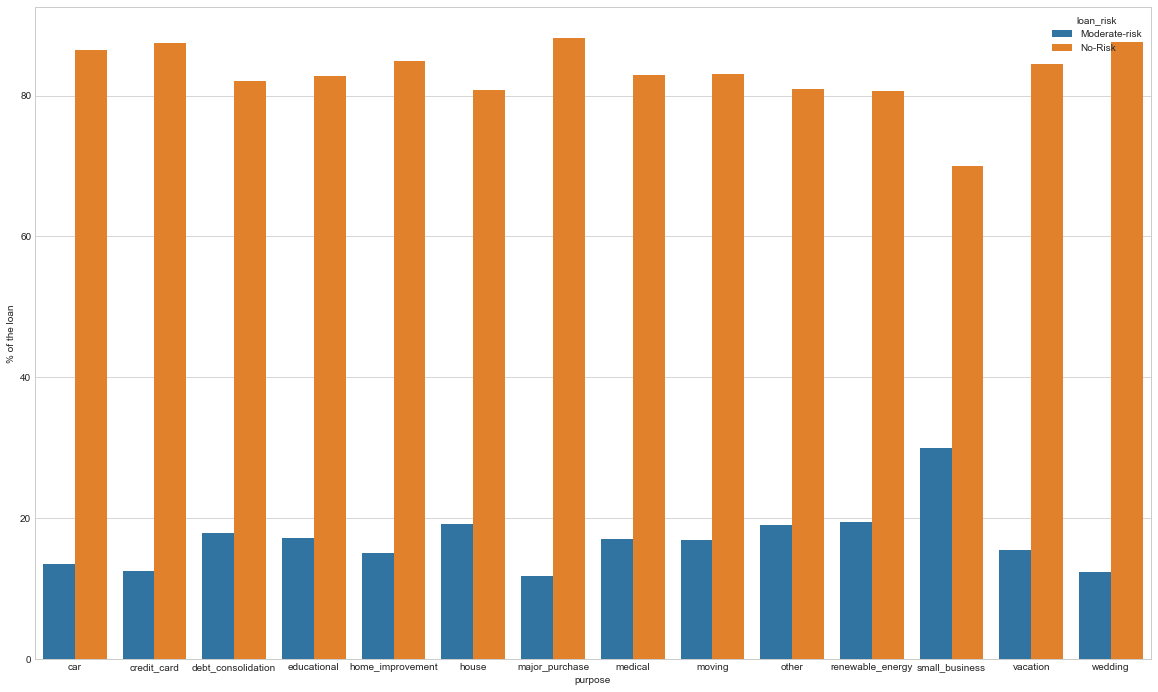

In [1944]:
purpose_condition = round(pd.crosstab(loan_df['loan_risk'], loan_df['purpose']).apply(lambda x: x/x.sum() * 100), 2)
data = pd.DataFrame(purpose_condition.stack().reset_index().rename(columns={0:'% of the loan'}))

plt.figure(figsize=(20, 12))
sns.barplot(x='purpose', y='% of the loan', hue='loan_risk', data=data)
plt.show()


In [1926]:
f_amount = loan_df.groupby(['income_category', 'purpose'])['funded_amnt'].mean()
by_funded_amount_df = pd.DataFrame(data=f_amount.round()).reset_index()

loan_count_data = loan_df.groupby(['income_category', 'purpose'])['loan_risk'].apply(lambda x: x.value_counts())
loan_data={"loan_count": loan_count_data}
loan_count_data_df = pd.DataFrame(data=loan_data).reset_index()
loan_count_data_df = loan_count_data_df.rename(columns={"level_2": "risk_on_loan"})

risk_factor_df = pd.DataFrame()

no_risk = loan_count_data_df.loc[loan_count_data_df['risk_on_loan'] == "No-Risk"].sort_values(by="income_category", ascending=True)
moderate_risk = loan_count_data_df.loc[loan_count_data_df['risk_on_loan'] == "Moderate-risk"].sort_values(by="income_category", ascending=True)
risk_factor_df['no_risk_count'] = no_risk['loan_count'].values
risk_factor_df['moderate_risk_count'] = moderate_risk['loan_count'].values
risk_factor_df['total_loans_issued'] = (no_risk['loan_count'].values + moderate_risk['loan_count'].values)
risk_factor_df['Moderate-Risk/No-Risk ratio (%)'] = np.around(moderate_risk['loan_count'].values / (moderate_risk['loan_count'].values + no_risk['loan_count'].values), 4) * 100

tem_df = no_risk
tem_df=tem_df.reset_index()
tem_df = tem_df.drop(['index','risk_on_loan','loan_count'],axis=1)

risk_factor_df['purpose'] = tem_df['purpose']
risk_factor_df['income_category'] = tem_df['income_category']
risk_factor_df  = risk_factor_df.sort_values(by='income_category', ascending=True)
risk_factor_df = risk_factor_df.reset_index()
risk_factor_df = risk_factor_df.drop(['index'],axis=1)
risk_factor_df.style.background_gradient('coolwarm')
#Findings :
#Bad Loans Count: People that apply for small business purposed tend to have a higher risk of being a bad loan. (% wise)
#Most frequent Purpose: The reason that clients applied the most for a loan was to consolidate debt.
#Less frequent purpose: Clients applied less for small business purposes for all three income categories.

,no_risk_count,moderate_risk_count,total_loans_issued,Moderate-Risk/No-Risk ratio (%),purpose,income_category
0,228,24,252,9.52,car,High
1,366,29,395,7.34,major_purchase,High
2,970,114,1084,10.52,credit_card,High
3,2815,502,3317,15.13,debt_consolidation,High
4,39,7,46,15.22,educational,High
5,70,19,89,21.35,house,High
6,542,122,664,18.37,other,High
7,861,114,975,11.69,home_improvement,High
8,89,8,97,8.25,moving,High
9,24,3,27,11.11,renewable_energy,High
